# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../LargeFilesResults/Model'  # where the outputs of this notebook will be saved

In [3]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_rmshared_revised.csv'))
summary    = pd.read_csv(os.path.join(results_path, 'fit_summary_rmshared_revised.csv'))

In [4]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

In [5]:
param_short = parameters.iloc[:900]

# Posteriors

In [6]:
posteriors

,"beta[1,1]","beta[2,1]","beta[3,1]","beta[4,1]","beta[5,1]","beta[1,2]","beta[2,2]","beta[3,2]","beta[4,2]","beta[5,2]",...,"beta[1,4]","beta[2,4]","beta[3,4]","beta[4,4]","beta[5,4]","beta[1,5]","beta[2,5]","beta[3,5]","beta[4,5]","beta[5,5]"
0,-1.138602,0.311533,1.445701,-0.007941,0.358873,-0.717833,0.902594,0.021808,-0.143929,0.158225,...,-0.114734,-0.968028,0.957840,0.151527,0.396661,-0.357687,0.420179,-0.667599,0.001885,0.015635
1,-1.300240,0.842897,0.548052,0.615832,0.318104,-0.059229,-0.027283,0.148234,0.496065,-0.311913,...,-0.575802,0.825850,0.098259,0.587545,-0.676117,-1.212589,0.143870,1.012336,-0.938883,1.119355
2,-1.309243,-0.143137,0.021571,0.469083,0.280511,0.130950,0.080584,0.353475,0.659082,-0.358758,...,-1.332969,1.210279,-0.331257,-0.068703,0.170433,-1.046730,0.606312,0.635143,-0.501437,0.691489
3,-0.734131,0.049531,0.180026,0.376260,-0.039356,-0.071871,0.102649,-0.312815,0.178697,-0.194416,...,0.263648,-1.498409,-0.337565,0.438419,-0.695967,-0.719339,0.321244,-0.604387,-0.282713,0.490568
4,-1.344217,-0.642302,0.207415,0.351943,0.315942,-0.201867,-0.160461,0.089896,0.439075,-0.073158,...,-1.319804,0.437064,0.961962,-0.638687,0.434877,-0.736756,0.124643,1.232554,-0.314630,0.593604
5,-0.814590,-0.088456,0.173928,0.380835,0.259947,-0.019098,0.575484,-0.848011,0.543518,-0.092174,...,0.414129,-1.595875,0.127986,0.980231,-0.628532,-0.416839,0.519046,-0.825583,-0.095409,0.284228
6,-1.366202,0.768667,-0.044841,0.434136,0.102105,-0.425279,-0.361081,0.006629,0.051996,-0.039955,...,-1.030564,0.626422,0.365789,-0.196544,-0.139799,-1.006002,0.015954,0.968725,-1.028455,0.994713
7,-0.883119,-0.797413,1.047218,0.273751,0.115177,-0.064470,0.332541,-0.349227,0.373625,-0.342089,...,0.350660,-0.122316,-0.524569,0.605214,-1.281713,-0.694814,0.577674,-0.422240,-0.419486,0.726292
8,-1.734888,1.910918,-0.522238,0.367822,0.237460,-0.224982,0.148256,0.254945,0.390649,-0.172212,...,-0.572560,-0.295620,0.569584,-0.330156,-0.306268,-0.660014,1.059910,0.452379,-0.318340,0.286902
9,-0.437719,-0.897316,0.377882,0.219445,0.175562,-0.442660,0.462352,0.398925,0.281316,0.016377,...,-0.124035,0.637268,-0.325235,0.452901,-0.099070,-0.294286,-0.290324,0.233768,-0.457639,0.441087


In [7]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = np.array(['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3'])
figsize      = (18, 18)
alpha        = 0.4

In [8]:
dimensions = posteriors.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


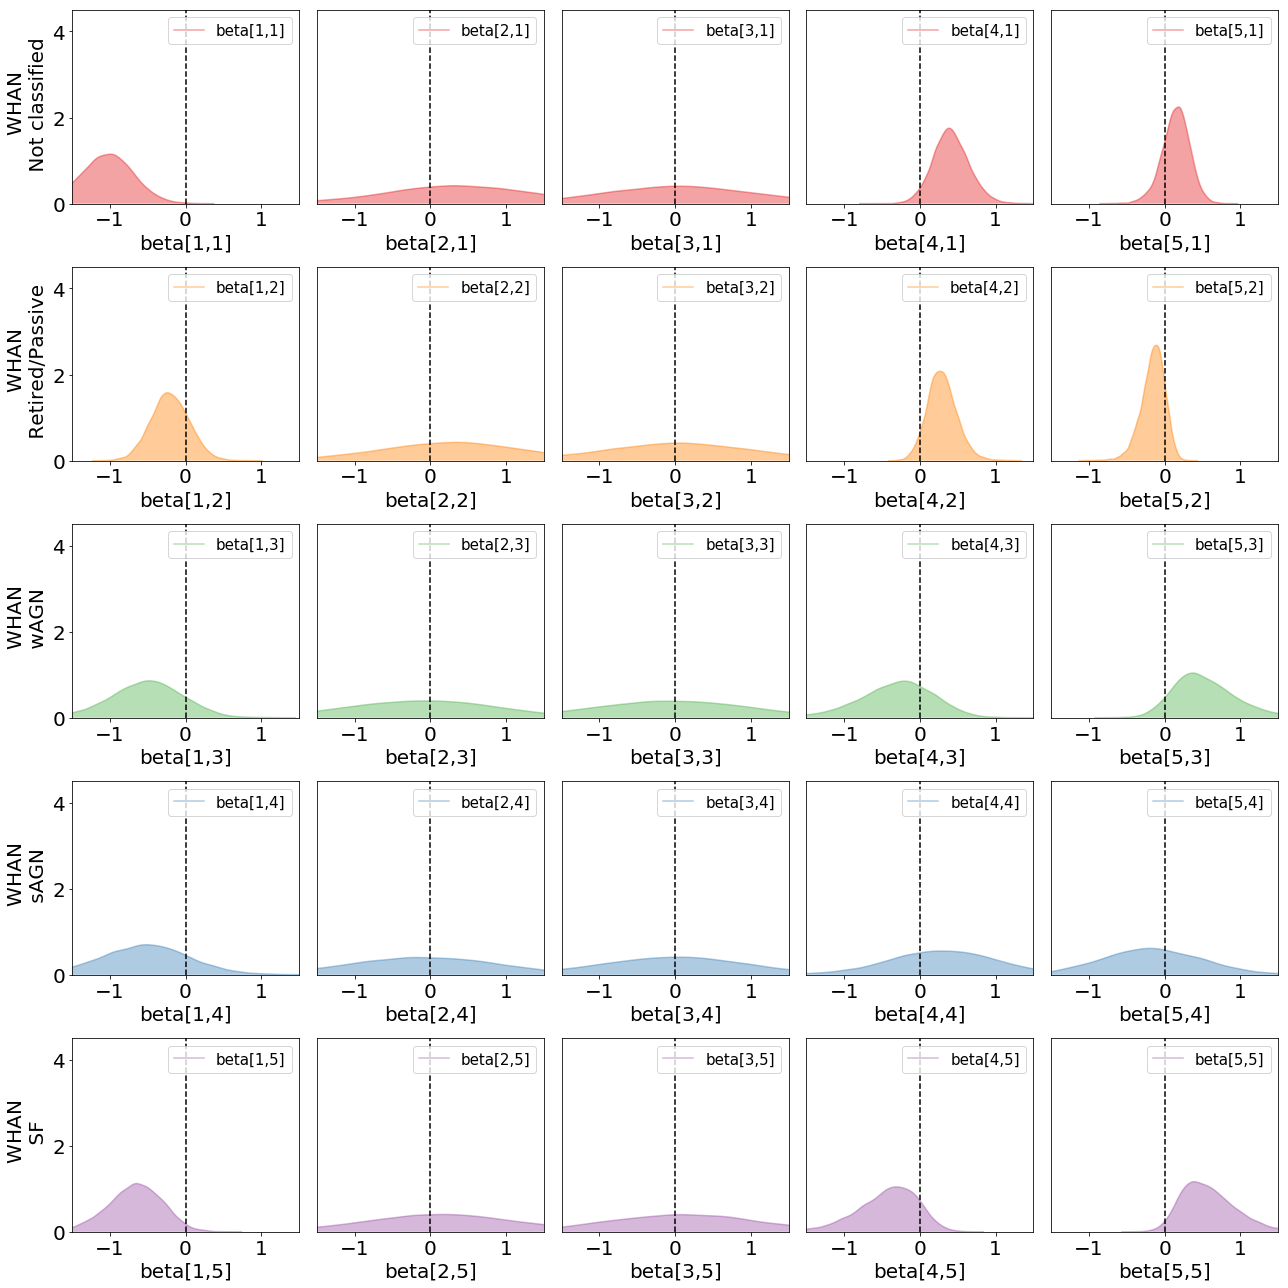

In [9]:
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
        plt.legend(loc='upper right', fontsize=15)
        plt.axvline(x=0, linestyle="--", color='black')
        plt.xlabel(r"%s" % str(name_temp), fontsize=20)
        plt.tick_params('both', labelsize='20')
        plt.xlim([-1.5,1.5])
        plt.ylim([0,4.5])      
        if (each_class==0):
            plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
        elif (each_class!=0): 
            plot_temp.yaxis.set_visible(False)            
        position+=1

plt.tight_layout()
plt.savefig(os.path.join(results_path, '25betas_rmshared_revised.png'), bbox_inch='tight')
plt.savefig(os.path.join(results_path, '25betas_rmshared_revised.pdf'), bbox_inch='tight')
plt.show()

# Simplifying the probabilities' dataframe

In [10]:
entire_fit = pd.read_csv(os.path.join(results_path, 'entirefit_rmshared_revised.csv'))

In [11]:
entire_fit.keys()

Index(['chain', 'draw', 'warmup', 'beta[1,1]', 'beta[2,1]', 'beta[3,1]',
       'beta[4,1]', 'beta[5,1]', 'beta[1,2]', 'beta[2,2]',
       ...
       'eta05[898]', 'eta05[899]', 'eta05[900]', 'lp__', 'accept_stat__',
       'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__'],
      dtype='object', length=9035)

In [12]:
header = np.array(entire_fit.keys())

In [13]:
prob_keys = []
for i in header:
    if i[0:4]=='prob':
        prob_keys.append(i)
    else:
        continue

In [14]:
probabilities = entire_fit[prob_keys]

In [15]:
probabilities

,prob01[1],prob01[2],prob01[3],prob01[4],prob01[5],prob01[6],prob01[7],prob01[8],prob01[9],prob01[10],...,prob05[891],prob05[892],prob05[893],prob05[894],prob05[895],prob05[896],prob05[897],prob05[898],prob05[899],prob05[900]
0,0.786844,0.788353,0.789993,0.791761,0.793653,0.795668,0.797802,0.800052,0.802415,0.804888,...,0.436451,0.435890,0.435236,0.434487,0.433645,0.432709,0.431679,0.430556,0.429339,0.428030
1,0.330099,0.333582,0.337152,0.340813,0.344563,0.348405,0.352338,0.356363,0.360481,0.364693,...,0.576260,0.580330,0.584531,0.588861,0.593318,0.597898,0.602601,0.607424,0.612365,0.617419
2,0.341195,0.340662,0.340133,0.339607,0.339084,0.338564,0.338047,0.337534,0.337023,0.336516,...,0.556769,0.561507,0.566323,0.571215,0.576183,0.581225,0.586338,0.591521,0.596771,0.602087
3,0.122929,0.123070,0.123222,0.123386,0.123561,0.123747,0.123945,0.124154,0.124375,0.124607,...,0.520226,0.519461,0.518609,0.517670,0.516645,0.515532,0.514333,0.513047,0.511674,0.510214
4,0.453452,0.450889,0.448357,0.445858,0.443391,0.440955,0.438553,0.436182,0.433843,0.431537,...,0.620707,0.625279,0.629994,0.634849,0.639840,0.644962,0.650213,0.655588,0.661081,0.666689
5,0.482962,0.482700,0.482463,0.482251,0.482065,0.481902,0.481765,0.481653,0.481566,0.481504,...,0.552604,0.551905,0.551088,0.550154,0.549102,0.547932,0.546644,0.545237,0.543713,0.542069
6,0.147514,0.149145,0.150788,0.152442,0.154108,0.155785,0.157473,0.159173,0.160885,0.162607,...,0.501313,0.504791,0.508407,0.512161,0.516053,0.520082,0.524247,0.528547,0.532982,0.537550
7,0.295091,0.292849,0.290741,0.288765,0.286921,0.285206,0.283620,0.282161,0.280828,0.279620,...,0.647563,0.648440,0.649261,0.650026,0.650735,0.651388,0.651986,0.652528,0.653014,0.653446
8,0.274407,0.280630,0.286876,0.293142,0.299425,0.305721,0.312025,0.318335,0.324647,0.330956,...,0.513888,0.519964,0.526099,0.532292,0.538538,0.544837,0.551187,0.557583,0.564025,0.570508
9,0.527040,0.523492,0.519995,0.516551,0.513159,0.509821,0.506536,0.503304,0.500127,0.497004,...,0.499550,0.499143,0.498769,0.498429,0.498122,0.497850,0.497610,0.497404,0.497232,0.497093


In [16]:
probabilities_transposed = probabilities.T

In [17]:
print(probabilities_transposed.columns)

RangeIndex(start=0, stop=10000, step=1)


In [18]:
iterations = probabilities_transposed.columns.size
new_header = []
for i in range(iterations):
    new_header.append('itr%i' % i)
print(len(new_header))

10000


In [19]:
probabilities_transposed.columns = new_header

In [20]:
probabilities_transposed

,itr0,itr1,itr2,itr3,itr4,itr5,itr6,itr7,itr8,itr9,...,itr9990,itr9991,itr9992,itr9993,itr9994,itr9995,itr9996,itr9997,itr9998,itr9999
prob01[1],0.786844,0.330099,0.341195,0.122929,0.453452,0.482962,0.147514,0.295091,0.274407,0.527040,...,0.273755,0.440055,0.205761,0.441814,0.130333,0.317916,0.454625,0.212944,0.401272,0.083400
prob01[2],0.788353,0.333582,0.340662,0.123070,0.450889,0.482700,0.149145,0.292849,0.280630,0.523492,...,0.276979,0.441747,0.208071,0.447093,0.132268,0.317485,0.458771,0.214608,0.407864,0.081214
prob01[3],0.789993,0.337152,0.340133,0.123222,0.448357,0.482463,0.150788,0.290741,0.286876,0.519995,...,0.280403,0.443358,0.210324,0.452440,0.134211,0.317021,0.462793,0.216182,0.414537,0.079073
prob01[4],0.791761,0.340813,0.339607,0.123386,0.445858,0.482251,0.152442,0.288765,0.293142,0.516551,...,0.284032,0.444888,0.212520,0.457852,0.136161,0.316523,0.466688,0.217665,0.421290,0.076978
prob01[5],0.793653,0.344563,0.339084,0.123561,0.443391,0.482065,0.154108,0.286921,0.299425,0.513159,...,0.287870,0.446337,0.214656,0.463329,0.138118,0.315991,0.470457,0.219054,0.428122,0.074928
prob01[6],0.795668,0.348405,0.338564,0.123747,0.440955,0.481902,0.155785,0.285206,0.305721,0.509821,...,0.291920,0.447705,0.216732,0.468871,0.140081,0.315427,0.474098,0.220349,0.435030,0.072922
prob01[7],0.797802,0.352338,0.338047,0.123945,0.438553,0.481765,0.157473,0.283620,0.312025,0.506536,...,0.296187,0.448991,0.218745,0.474476,0.142051,0.314829,0.477610,0.221547,0.442013,0.070960
prob01[8],0.800052,0.356363,0.337534,0.124154,0.436182,0.481653,0.159173,0.282161,0.318335,0.503304,...,0.300674,0.450196,0.220694,0.480143,0.144026,0.314199,0.480993,0.222649,0.449068,0.069041
prob01[9],0.802415,0.360481,0.337023,0.124375,0.433843,0.481566,0.160885,0.280828,0.324647,0.500127,...,0.305387,0.451319,0.222578,0.485871,0.146007,0.313535,0.484247,0.223652,0.456193,0.067165
prob01[10],0.804888,0.364693,0.336516,0.124607,0.431537,0.481504,0.162607,0.279620,0.330956,0.497004,...,0.310329,0.452360,0.224394,0.491658,0.147992,0.312839,0.487370,0.224557,0.463386,0.065330


In [21]:
percentiles = [0.025, 0.25, 0.50, 0.75, 0.975]

In [22]:
lines = probabilities_transposed.iloc[:, 0].size

for i in range(lines):   
    if i==0:
        stats_temp    = probabilities_transposed.iloc[i, :].describe(percentiles=percentiles)
        shrinked_temp = pd.DataFrame(stats_temp)
    else:
        stats_temp    = pd.DataFrame(probabilities_transposed.iloc[i, :].describe(percentiles=percentiles))
        shrinked_temp = shrinked_temp.join(stats_temp)
shrinked_df = shrinked_temp.T
shrinked_df

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max
prob01[1],10000.0,0.316310,0.227399,0.000170,0.014212,0.124739,0.271268,0.471846,0.822012,0.980765
prob01[2],10000.0,0.317350,0.227629,0.000173,0.014387,0.125928,0.272752,0.474180,0.823742,0.980971
prob01[3],10000.0,0.318409,0.227886,0.000176,0.014487,0.126769,0.273644,0.475905,0.823955,0.981174
prob01[4],10000.0,0.319487,0.228170,0.000179,0.014422,0.127677,0.275048,0.475662,0.825028,0.981376
prob01[5],10000.0,0.320584,0.228481,0.000183,0.014463,0.128214,0.276817,0.476028,0.825641,0.981576
prob01[6],10000.0,0.321700,0.228821,0.000186,0.014686,0.129014,0.278619,0.477425,0.826403,0.981775
prob01[7],10000.0,0.322835,0.229189,0.000190,0.014789,0.129656,0.280146,0.478303,0.828147,0.981972
prob01[8],10000.0,0.323990,0.229586,0.000193,0.014872,0.130434,0.281349,0.480099,0.828410,0.982168
prob01[9],10000.0,0.325164,0.230014,0.000193,0.015030,0.131491,0.282343,0.481723,0.830279,0.982362
prob01[10],10000.0,0.326357,0.230472,0.000190,0.015076,0.132470,0.283513,0.483477,0.831766,0.982554


In [23]:
print(shrinked_df.values.shape, parameters.shape)

(4500, 10) (4500, 2)


In [24]:
loc = shrinked_df.iloc[0, :].size
print(loc)

10


In [25]:
shrinked_df.insert(loc=loc, value=parameters['LOG_STELLAR_MASS'].values, column='LOG_STELLAR_MASS')

In [26]:
shrinked_df.insert(loc=(loc+1), value=parameters['Z'].values, column='Z')

In [27]:
shrinked_df

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
prob01[1],10000.0,0.316310,0.227399,0.000170,0.014212,0.124739,0.271268,0.471846,0.822012,0.980765,9.0,0.067940
prob01[2],10000.0,0.317350,0.227629,0.000173,0.014387,0.125928,0.272752,0.474180,0.823742,0.980971,9.0,0.084889
prob01[3],10000.0,0.318409,0.227886,0.000176,0.014487,0.126769,0.273644,0.475905,0.823955,0.981174,9.0,0.101837
prob01[4],10000.0,0.319487,0.228170,0.000179,0.014422,0.127677,0.275048,0.475662,0.825028,0.981376,9.0,0.118786
prob01[5],10000.0,0.320584,0.228481,0.000183,0.014463,0.128214,0.276817,0.476028,0.825641,0.981576,9.0,0.135734
prob01[6],10000.0,0.321700,0.228821,0.000186,0.014686,0.129014,0.278619,0.477425,0.826403,0.981775,9.0,0.152683
prob01[7],10000.0,0.322835,0.229189,0.000190,0.014789,0.129656,0.280146,0.478303,0.828147,0.981972,9.0,0.169632
prob01[8],10000.0,0.323990,0.229586,0.000193,0.014872,0.130434,0.281349,0.480099,0.828410,0.982168,9.0,0.186580
prob01[9],10000.0,0.325164,0.230014,0.000193,0.015030,0.131491,0.282343,0.481723,0.830279,0.982362,9.0,0.203529
prob01[10],10000.0,0.326357,0.230472,0.000190,0.015076,0.132470,0.283513,0.483477,0.831766,0.982554,9.0,0.220478


In [28]:
shrinked_df.to_csv(os.path.join(results_path, 'allprobabilities_summ_rmshared_revised.csv'))

In [29]:
step = 900
prob01 = shrinked_df.iloc[:step, :]
prob02 = shrinked_df.iloc[step:(step*2), :]
prob03 = shrinked_df.iloc[(step*2):(step*3), :]
prob04 = shrinked_df.iloc[(step*3):(step*4), :]
prob05 = shrinked_df.iloc[(step*4):(step*5), :]

### Testing first class

In [75]:
zu = np.unique(prob02['LOG_STELLAR_MASS'].values)

In [77]:
subset = prob02[prob02['LOG_STELLAR_MASS'].values==zu[12]]

<IPython.core.display.Javascript object>


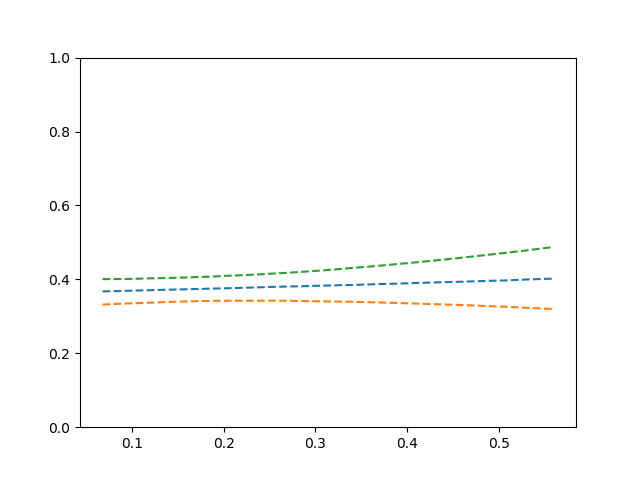

In [88]:
plt.plot(subset['Z'], subset['50%'], '--')
plt.plot(subset['Z'], subset['25%'], '--')
plt.plot(subset['Z'], subset['75%'], '--')
plt.ylim([0,1.])
plt.show()

In [33]:
np.unique(prob01['Z'].values)

array([0.06794   , 0.08488862, 0.10183724, 0.11878586, 0.13573448,
       0.1526831 , 0.16963172, 0.18658034, 0.20352897, 0.22047759,
       0.23742621, 0.25437483, 0.27132345, 0.28827207, 0.30522069,
       0.32216931, 0.33911793, 0.35606655, 0.37301517, 0.38996379,
       0.40691241, 0.42386103, 0.44080966, 0.45775828, 0.4747069 ,
       0.49165552, 0.50860414, 0.52555276, 0.54250138, 0.55945   ])

In [34]:
subset = prob01[prob01['Z']<0.07]

In [35]:
subset

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
prob01[1],10000.0,0.316310,0.227399,0.000170,0.014212,0.124739,0.271268,0.471846,0.822012,0.980765,9.000000,0.06794
prob01[31],10000.0,0.299851,0.207564,0.000344,0.018328,0.129487,0.260168,0.436365,0.773279,0.967061,9.068966,0.06794
prob01[61],10000.0,0.284563,0.187667,0.000677,0.023594,0.133888,0.250257,0.402976,0.714946,0.945720,9.137931,0.06794
prob01[91],10000.0,0.270705,0.168115,0.001293,0.029916,0.138364,0.242348,0.374972,0.657558,0.917308,9.206897,0.06794
prob01[121],10000.0,0.258492,0.149313,0.002399,0.037734,0.143089,0.235516,0.349922,0.602469,0.878679,9.275862,0.06794
prob01[151],10000.0,0.248082,0.131633,0.004320,0.046700,0.148202,0.230027,0.326583,0.549667,0.828681,9.344828,0.06794
prob01[181],10000.0,0.239570,0.115384,0.007550,0.057191,0.153991,0.225747,0.309465,0.503494,0.767689,9.413793,0.06794
prob01[211],10000.0,0.232992,0.100795,0.012796,0.068968,0.159797,0.222050,0.294016,0.457916,0.697829,9.482759,0.06794
prob01[241],10000.0,0.228332,0.088021,0.021005,0.082251,0.164531,0.220330,0.281745,0.424433,0.638470,9.551724,0.06794
prob01[271],10000.0,0.225536,0.077169,0.031304,0.095866,0.169997,0.219009,0.273102,0.397493,0.590687,9.620690,0.06794


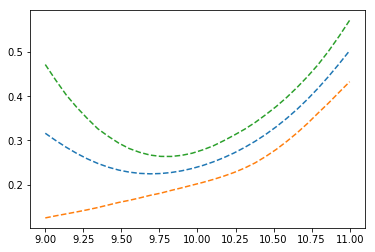

In [36]:
plt.plot(subset['LOG_STELLAR_MASS'], subset['mean'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['25%'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['75%'], '--')
plt.show()

# Checking automatic summary from STAN

In [37]:
summary_stan = pd.read_csv(os.path.join(results_path, 'fit_summary_rmshared_revised.csv'))

In [38]:
summary_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.32,0.00220,0.23,0.01,0.12,0.27,0.47,0.82,10672,1.0,0.067940,9.0
1,prob01[2],0.32,0.00220,0.23,0.01,0.13,0.27,0.47,0.82,10624,1.0,0.084889,9.0
2,prob01[3],0.32,0.00220,0.23,0.01,0.13,0.27,0.48,0.82,10573,1.0,0.101837,9.0
3,prob01[4],0.32,0.00220,0.23,0.01,0.13,0.28,0.48,0.83,10518,1.0,0.118786,9.0
4,prob01[5],0.32,0.00220,0.23,0.01,0.13,0.28,0.48,0.83,10460,1.0,0.135734,9.0
5,prob01[6],0.32,0.00220,0.23,0.01,0.13,0.28,0.48,0.83,10403,1.0,0.152683,9.0
6,prob01[7],0.32,0.00230,0.23,0.01,0.13,0.28,0.48,0.83,10351,1.0,0.169632,9.0
7,prob01[8],0.32,0.00230,0.23,0.01,0.13,0.28,0.48,0.83,10296,1.0,0.186580,9.0
8,prob01[9],0.33,0.00230,0.23,0.02,0.13,0.28,0.48,0.83,10240,1.0,0.203529,9.0
9,prob01[10],0.33,0.00230,0.23,0.02,0.13,0.28,0.48,0.83,10181,1.0,0.220478,9.0


In [46]:
prob01_stan = summary_stan.iloc[:900, :]

In [47]:
prob01_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.32,0.00220,0.23,0.01,0.12,0.27,0.47,0.82,10672,1.0,0.067940,9.0
1,prob01[2],0.32,0.00220,0.23,0.01,0.13,0.27,0.47,0.82,10624,1.0,0.084889,9.0
2,prob01[3],0.32,0.00220,0.23,0.01,0.13,0.27,0.48,0.82,10573,1.0,0.101837,9.0
3,prob01[4],0.32,0.00220,0.23,0.01,0.13,0.28,0.48,0.83,10518,1.0,0.118786,9.0
4,prob01[5],0.32,0.00220,0.23,0.01,0.13,0.28,0.48,0.83,10460,1.0,0.135734,9.0
5,prob01[6],0.32,0.00220,0.23,0.01,0.13,0.28,0.48,0.83,10403,1.0,0.152683,9.0
6,prob01[7],0.32,0.00230,0.23,0.01,0.13,0.28,0.48,0.83,10351,1.0,0.169632,9.0
7,prob01[8],0.32,0.00230,0.23,0.01,0.13,0.28,0.48,0.83,10296,1.0,0.186580,9.0
8,prob01[9],0.33,0.00230,0.23,0.02,0.13,0.28,0.48,0.83,10240,1.0,0.203529,9.0
9,prob01[10],0.33,0.00230,0.23,0.02,0.13,0.28,0.48,0.83,10181,1.0,0.220478,9.0


In [48]:
chosen_mass = np.unique(prob01_stan['LOG_STELLAR_MASS'].values)[12]

In [49]:
chosen_mass

9.827586206896553

In [50]:
subset_temp = prob01_stan[prob01_stan['LOG_STELLAR_MASS']==chosen_mass]

In [51]:
subset_temp

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
360,prob01[361],0.23,0.00046,0.06,0.13,0.19,0.22,0.26,0.35,15199,1.0,0.067940,9.827586
361,prob01[362],0.23,0.00045,0.06,0.13,0.19,0.22,0.26,0.35,15465,1.0,0.084889,9.827586
362,prob01[363],0.23,0.00045,0.06,0.13,0.19,0.23,0.27,0.35,15719,1.0,0.101837,9.827586
363,prob01[364],0.23,0.00044,0.06,0.13,0.19,0.23,0.27,0.35,15954,1.0,0.118786,9.827586
364,prob01[365],0.23,0.00044,0.06,0.13,0.19,0.23,0.27,0.35,16161,1.0,0.135734,9.827586
365,prob01[366],0.23,0.00044,0.06,0.13,0.19,0.23,0.27,0.35,16334,1.0,0.152683,9.827586
366,prob01[367],0.23,0.00044,0.06,0.13,0.19,0.23,0.27,0.35,16468,1.0,0.169632,9.827586
367,prob01[368],0.24,0.00044,0.06,0.13,0.19,0.23,0.27,0.36,16557,1.0,0.186580,9.827586
368,prob01[369],0.24,0.00045,0.06,0.13,0.20,0.23,0.27,0.36,16600,1.0,0.203529,9.827586
369,prob01[370],0.24,0.00045,0.06,0.13,0.20,0.23,0.28,0.36,16597,1.0,0.220478,9.827586


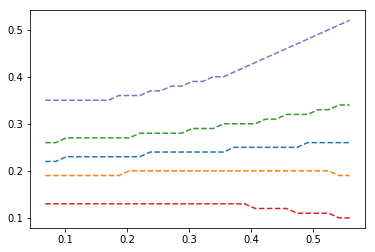

In [52]:
plt.plot(subset_temp['Z'], subset_temp['50%'], '--')
plt.plot(subset_temp['Z'], subset_temp['25%'], '--')
plt.plot(subset_temp['Z'], subset_temp['75%'], '--')
plt.plot(subset_temp['Z'], subset_temp['2.5%'], '--')
plt.plot(subset_temp['Z'], subset_temp['97.5%'], '--')
plt.show()

In [63]:
%matplotlib notebook

<IPython.core.display.Javascript object>


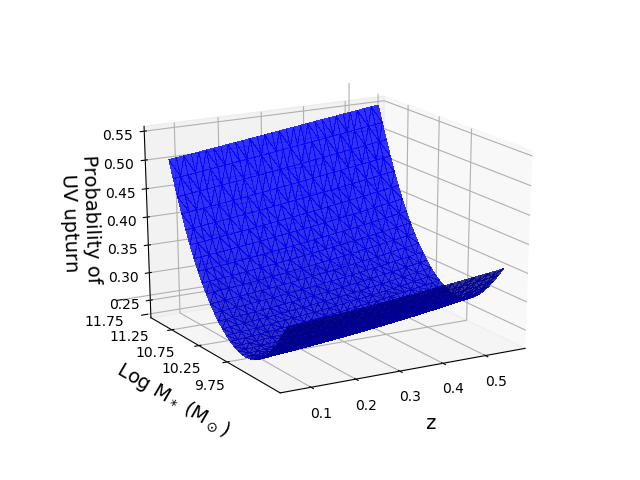

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot_trisurf(prob01_stan['Z'], prob01_stan['LOG_STELLAR_MASS'], prob01_stan['mean'], color='#a6611a', alpha=0.8, 
#                 linewidth=0, antialiased=False)
ax.plot_trisurf(prob01['Z'], prob01['LOG_STELLAR_MASS'], prob01['mean'], color='blue', alpha=0.8, 
                linewidth=0, antialiased=False)
ax.set_xlabel("\n z", fontsize=14)
ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
ax.set_zlabel("\n Probability of \n UV upturn", fontsize=14)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
ax.view_init(elev=22., azim=315)
plt.show()

In [ ]:
# prob01.boxplot(column='50%')

In [ ]:
# prob01_stan.boxplot(column='50%')

# Last check to be 100% sure (for one class - class 1 - lineless)

In [67]:
m = 0
z = np.arange(0., 0.5, 0.01)
p = posteriors

In [68]:
# regression = []
regression_temp = []
for i in range(p['beta[1,1]'].values.size):
    for redshift in range(z.size):
        a = p['beta[1,1]'].values[i]
        b = p['beta[2,1]'].values[i] * z[redshift]
        c = p['beta[3,1]'].values[i] * z[redshift]**2
        d = p['beta[4,1]'].values[i] * m
        e = p['beta[5,1]'].values[i] * m**2
        
        f_x = np.sum([a,b,c,d,e])
        p_i = 1./(1+np.exp(-f_x))

        regression_temp.append([p_i, z[redshift], int(i)])
regression = np.array(regression_temp)

In [81]:
prob  = regression[:,0]
redsh = regression[:,1]
beta  = regression[:,2]

In [86]:
idx = np.where(beta<=20)

<IPython.core.display.Javascript object>


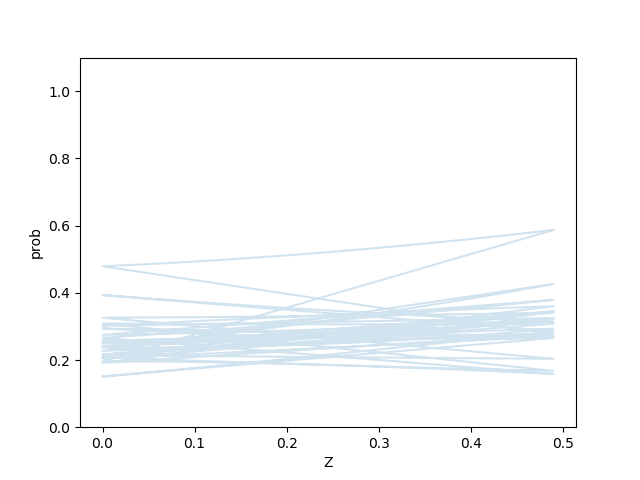

In [87]:
plt.plot(redsh[idx], prob[idx], '-', alpha=0.2)
plt.xlabel("Z")
plt.ylabel("prob")
plt.ylim([0,1.1])
plt.show()